# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint as pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

628


In [3]:
# Initializing a variable to hold the number of cities per set
div = 50
# Initializing a variable to hold the number of sets within the length of cities
lim = len(cities) // div 
# Initializing a list to hold the lists of cities 
sets = [cities[(i * div):(i * div + div)]
           for i in range(0, lim)] # for i in range(0, 25)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Initializing variables to hold the API URL, units of measure, and the concatinated query_url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="

In [17]:
city = "London"
test_query = requests.get(query_url + city).json()
print(test_query["coord"])

{'lon': -0.13, 'lat': 51.51}


In [18]:
# Initializing two variables to hold the initial indices of set and city number
set_num = 1
city_num = 1
# Initializing empty lists to hold each aspect of the climate data for each city
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
# Printing a message that states that data retrieval has begun
print("Beginning Data Retrieval")
print("-----------------------------")
# Looping through the cities within each set and querying the API for the climate data for each city
for set in sets:
    for city in set:
        # Using an exception to handle cases where climate data may not exist for a given city
        try:
            # Initializing a variable to hold the dict object generated by the API query
            city_response = requests.get(query_url + city).json()
            # Appending each individual climate data list with the related data from the API query
            city_name.append(city_response["name"])
            cloudiness.append(city_response["clouds"]["all"])
            country.append(city_response["sys"]["country"])
            date.append(city_response["dt"])
            humidity.append(city_response["main"]["humidity"])
            lat.append(city_response["coord"]["lat"])
            lng.append(city_response["coord"]["lon"])
            max_temp.append(city_response["main"]["temp_max"])
            wind_speed.append(city_response["wind"]["speed"])
            print(f"Processing Record {city_num} for Set {set_num} | {city.title()}")
            # Incrementing city_num by 1 for the next city in the set
            
        # Handling the excpetion by printing a message saying that the city wasn't found
        except (KeyError):
            print("City not found. Skipping...")
        # Incrementing the set_num by 1 for the next set
        city_num += 1
    # Incremeneting city_num back to 1, and set_num by 1 once the end of each set has been reached  
    city_num = 1    
    set_num += 1

Beginning Data Retrieval
-----------------------------
Processing Record 1 for Set 1 | Rikitea
Processing Record 2 for Set 1 | Ponta Do Sol
Processing Record 3 for Set 1 | Arman
Processing Record 4 for Set 1 | General Pico
Processing Record 5 for Set 1 | Sioux Lookout
Processing Record 6 for Set 1 | East London
Processing Record 7 for Set 1 | Mataura
Processing Record 8 for Set 1 | Castro
City not found. Skipping...
Processing Record 10 for Set 1 | Puerto Narino
Processing Record 11 for Set 1 | Kodiak
Processing Record 12 for Set 1 | Slave Lake
Processing Record 13 for Set 1 | San Quintin
Processing Record 14 for Set 1 | Bluff
Processing Record 15 for Set 1 | Atuona
Processing Record 16 for Set 1 | Airai
City not found. Skipping...
Processing Record 18 for Set 1 | Luan
Processing Record 19 for Set 1 | Maroantsetra
Processing Record 20 for Set 1 | Port Lincoln
Processing Record 21 for Set 1 | Grand Gaube
Processing Record 22 for Set 1 | Jamestown
Processing Record 23 for Set 1 | Butarit

Processing Record 3 for Set 5 | Pacific Grove
Processing Record 4 for Set 5 | Fereydun Kenar
Processing Record 5 for Set 5 | Seguin
Processing Record 6 for Set 5 | Chicama
Processing Record 7 for Set 5 | Havre-Saint-Pierre
Processing Record 8 for Set 5 | Marawi
Processing Record 9 for Set 5 | Ishikawa
Processing Record 10 for Set 5 | Umea
Processing Record 11 for Set 5 | Itaituba
Processing Record 12 for Set 5 | Bathsheba
Processing Record 13 for Set 5 | Mwense
Processing Record 14 for Set 5 | Carnarvon
Processing Record 15 for Set 5 | Surgana
Processing Record 16 for Set 5 | Port Blair
Processing Record 17 for Set 5 | Sabzevar
Processing Record 18 for Set 5 | Hede
Processing Record 19 for Set 5 | Walvis Bay
City not found. Skipping...
Processing Record 21 for Set 5 | Atambua
City not found. Skipping...
Processing Record 23 for Set 5 | Chara
Processing Record 24 for Set 5 | Ambagarh Chauki
Processing Record 25 for Set 5 | Nikolskoye
Processing Record 26 for Set 5 | Naliya
Processing Re

City not found. Skipping...
City not found. Skipping...
Processing Record 8 for Set 9 | Linhares
Processing Record 9 for Set 9 | Paamiut
Processing Record 10 for Set 9 | Tabou
Processing Record 11 for Set 9 | Kajaani
Processing Record 12 for Set 9 | Tucumcari
Processing Record 13 for Set 9 | Bubanza
Processing Record 14 for Set 9 | Shihezi
Processing Record 15 for Set 9 | Salinas
City not found. Skipping...
City not found. Skipping...
Processing Record 18 for Set 9 | Salalah
Processing Record 19 for Set 9 | Ponta Delgada
City not found. Skipping...
Processing Record 21 for Set 9 | Puerto Padre
Processing Record 22 for Set 9 | Biltine
Processing Record 23 for Set 9 | Namatanai
Processing Record 24 for Set 9 | Ust-Kuyga
Processing Record 25 for Set 9 | Den Helder
Processing Record 26 for Set 9 | Wajima
Processing Record 27 for Set 9 | Las Rozas De Madrid
Processing Record 28 for Set 9 | Padang
City not found. Skipping...
Processing Record 30 for Set 9 | Adet
Processing Record 31 for Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
# Initalizing a DataFrame with the query results from each city
city_climate_df = pd.DataFrame({"City": city_name,
                                "Country": country,
                                "Latitude": lat,
                                "Longitude": lng,
                                "Max Temp (C)": max_temp,
                                "Humidity (%)": humidity,
                                "Wind Speed (m/s)": wind_speed,
                                "Cloudiness (%)": cloudiness,
                                "Date": date,})
# Displaying city_climate_df
city_climate_df.head()

,City,Country,Latitude,Longitude,Max Temp (C),Humidity (%),Wind Speed (m/s),Cloudiness (%),Date
0,Rikitea,PF,-23.12,-134.97,23.45,81,4.50,64,1561585502
1,Ponta do Sol,BR,-20.63,-46.00,21.15,54,2.23,82,1561585734
2,Arman,RU,59.70,150.17,16.65,54,2.65,22,1561585735
3,General Pico,AR,-35.66,-63.75,10.45,34,2.73,96,1561585735
4,Sioux Lookout,CA,50.10,-91.92,25.00,77,3.10,75,1561585735


In [29]:
# Export city_climate_df as a .csv file
export_csv = city_climate_df.to_csv("cities_climate_data.csv", index=True, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

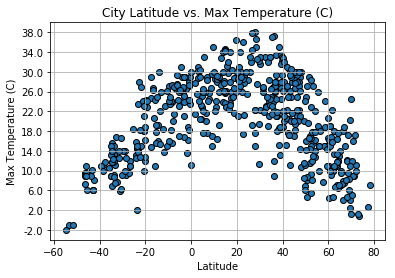

In [92]:
#
fig, ax = plt.subplots()
# 
x_data = city_climate_df["Latitude"]
y_data = city_climate_df["Max Temp (C)"]
ax.scatter(x_data, y_data, edgecolor="black")
#
ax.set_yticks(np.arange(y_data.min(), y_data.max() + 4, 4))
ax.set_yticklabels(np.arange(y_data.min(), y_data.max() + 4, 4))
ax.grid()
#
todays_date = city_climate_df["Date"].max()
ax.set_title("City Latitude vs. Max Temperature (C)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (C)")
#
plt.show()

#### Latitude vs. Humidity Plot

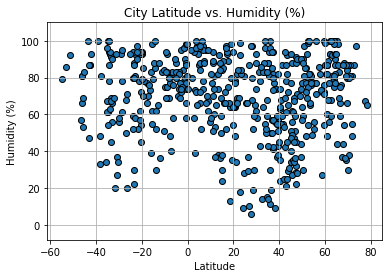

In [91]:
#
fig, ax = plt.subplots()
# 
x_data = city_climate_df["Latitude"]
y_data = city_climate_df["Humidity (%)"]
ax.scatter(x_data, y_data, edgecolor="black")
#
ax.set_ylim(top=110)
ax.grid()
#
todays_date = city_climate_df["Date"].max()
ax.set_title("City Latitude vs. Humidity (%)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
#
plt.show()

#### Latitude vs. Cloudiness Plot

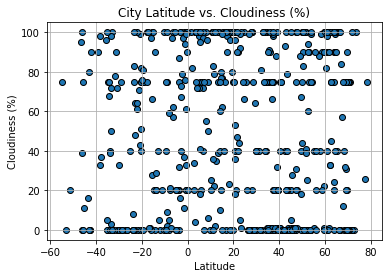

In [98]:
#
fig, ax = plt.subplots()
# 
x_data = city_climate_df["Latitude"]
y_data = city_climate_df["Cloudiness (%)"]
ax.scatter(x_data, y_data, edgecolor="black")
#
ax.grid()
#
todays_date = city_climate_df["Date"].max()
ax.set_title("City Latitude vs. Cloudiness (%)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
#
plt.show()

#### Latitude vs. Wind Speed Plot

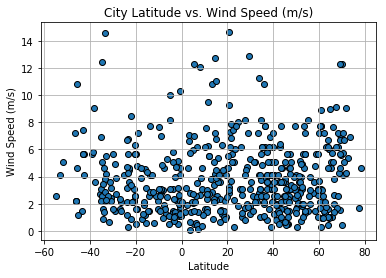

In [99]:
#
fig, ax = plt.subplots()
# 
x_data = city_climate_df["Latitude"]
y_data = city_climate_df["Wind Speed (m/s)"]
ax.scatter(x_data, y_data, edgecolor="black")
#
ax.grid()
#
todays_date = city_climate_df["Date"].max()
ax.set_title("City Latitude vs. Wind Speed (m/s)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (m/s)")
#
plt.show()